<a href="https://colab.research.google.com/github/gojalifs/kmeans_clustering/blob/master/with_indah_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Library yang Dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import kmeans_plusplus
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold


In [29]:
# 1. Pengumpulan Data
# data = pd.read_excel('dataset ok last.xlsx')
data = pd.read_excel('DATASET OK.xlsx')

In [30]:
# Melihat beberapa baris pertama untuk memeriksa data
data.head()
df = data

In [31]:
print("Missing values per kolom:")
print(df.isnull().sum())

Missing values per kolom:
name                0
artist              0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
dtype: int64


In [32]:
df = df.dropna()

In [33]:
audio_features = [
    'length', 'danceability', 'acousticness', 'energy', 'instrumentalness',
    'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'time_signature'
]
df_audio = df[audio_features]

print("Fitur yang dipilih setelah seleksi: ")
df_audio

Fitur yang dipilih setelah seleksi: 


,danceability,acousticness,energy,instrumentalness
0,0.890,0.130000,0.886,0.000000
1,0.324,0.008420,0.928,0.000000
2,0.507,0.000269,0.920,0.001290
3,0.457,0.183000,0.630,0.438000
4,0.530,0.055300,0.628,0.122000
...,...,...,...,...
695,0.747,0.644000,0.627,0.018800
696,0.581,0.283000,0.643,0.000002
697,0.791,0.446000,0.499,0.000024
698,0.776,0.319000,0.442,0.000013


In [34]:
scaler = MinMaxScaler()
df_audio_scaled = pd.DataFrame(scaler.fit_transform(df_audio), columns=audio_features)

In [35]:
# df_audio_scaled = df_audio
df_audio_scaled

,danceability,acousticness,energy,instrumentalness
0,0.886044,0.132960,0.885534,0.000000
1,0.161332,0.008504,0.931320,0.000000
2,0.395647,0.000160,0.922599,0.001338
3,0.331626,0.187214,0.606454,0.454357
4,0.425096,0.056493,0.604273,0.126556
...,...,...,...,...
695,0.702945,0.659121,0.603183,0.019502
696,0.490397,0.289580,0.620626,0.000002
697,0.759283,0.456437,0.463643,0.000025
698,0.740077,0.326432,0.401504,0.000014


In [36]:
from scipy.stats import zscore
z_scores = np.abs(zscore(df_audio_scaled))
outliers = (z_scores > 3).sum()
print("\nJumlah outlier per fitur (berdasarkan Z-score > 3):")
print(pd.Series(outliers, index=audio_features))


Jumlah outlier per fitur (berdasarkan Z-score > 3):
danceability        19
acousticness        19
energy              19
instrumentalness    19
dtype: int64


In [37]:
data_selected = df_audio_scaled.copy()
features = audio_features

In [38]:
# Menghitung IQR dan menentukan batas outlier
def detect_outliers_iqr_table(df, features):
    outlier_data = []  # Menyimpan data outlier

    for feature in features:
        Q1 = df[feature].quantile(0.25)  # Kuartil pertama
        Q3 = df[feature].quantile(0.75)  # Kuartil ketiga
        IQR = Q3 - Q1  # Rentang antar kuartil

        lower_bound = Q1 - 1.5 * IQR  # Batas bawah
        upper_bound = Q3 + 1.5 * IQR  # Batas atas

        # Menemukan indeks dan nilai outlier
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        for index, value in outliers.items():
            outlier_data.append({"Feature": feature, "Index": index, "Outlier Value": value})

    return pd.DataFrame(outlier_data)

# Mendeteksi outlier dan membuat tabel
outlier_table = detect_outliers_iqr_table(data_selected, features)

# Menampilkan tabel outlier
print("Tabel Outlier:")
print(outlier_table)

# Menampilkan tabel secara ringkas (contoh jika terlalu besar)
print("\nRingkasan Tabel Outlier:")
outlier_table.head(5)  # Menampilkan 10 baris pertama

Tabel Outlier:
              Feature  Index  Outlier Value
0    instrumentalness      2       0.001338
1    instrumentalness      3       0.454357
2    instrumentalness      4       0.126556
3    instrumentalness      6       0.024170
4    instrumentalness     15       0.010581
..                ...    ...            ...
144  instrumentalness    677       1.000000
145  instrumentalness    678       0.003112
146  instrumentalness    693       0.002376
147  instrumentalness    694       0.005249
148  instrumentalness    695       0.019502

[149 rows x 3 columns]

Ringkasan Tabel Outlier:


,Feature,Index,Outlier Value
0,instrumentalness,2,0.001338
1,instrumentalness,3,0.454357
2,instrumentalness,4,0.126556
3,instrumentalness,6,0.024170
4,instrumentalness,15,0.010581


In [11]:
# download the result from outlier_table above
outlier_table.to_csv('outlier_table.csv', index=False)


In [11]:
!pip install kneed

In [14]:

# Step 2: Baca CSV
# df = pd.read_excel('data_set_normalized.xlsx')

# Tampilkan data awal
print("\nData sample:")
# df.head()
data_selected



Data sample:


,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.886044,0.132960,0.885534,0.000000,0.363625,0.776479,0.296574,0.439455,0.825773
1,0.161332,0.008504,0.931320,0.000000,0.056280,0.780593,0.150027,0.849216,0.262887
2,0.395647,0.000160,0.922599,0.001338,0.075126,0.693894,0.040850,0.591355,0.652577
3,0.331626,0.187214,0.606454,0.454357,0.078224,0.655160,0.006778,0.241684,0.342268
4,0.425096,0.056493,0.604273,0.126556,0.059894,0.565752,0.010258,0.512364,0.230928
...,...,...,...,...,...,...,...,...,...
695,0.702945,0.659121,0.603183,0.019502,0.572738,0.615423,0.016853,0.287675,0.410309
696,0.490397,0.289580,0.620626,0.000002,0.083903,0.519743,0.018868,0.657586,0.811340
697,0.759283,0.456437,0.463643,0.000025,0.080805,0.522402,0.050925,0.307507,0.689691
698,0.740077,0.326432,0.401504,0.000014,0.058087,0.496413,0.063015,0.307737,0.863918


In [17]:
# Step 3: Pilih kolom
print("\nKolom tersedia:")
print(list(df.columns))

# Input kolom yang ingin digunakan
cols = ['length', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'time_signature']
# cols = [c.strip() for c in cols]

# Ambil data numerik dan buang NaN
data = df[cols].dropna()
data_values = data.values


Kolom tersedia:
['name', 'artist', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


KeyError: "['length', 'time_signature'] not in index"

In [39]:
df_audio_scaled

,danceability,acousticness,energy,instrumentalness
0,0.886044,0.132960,0.885534,0.000000
1,0.161332,0.008504,0.931320,0.000000
2,0.395647,0.000160,0.922599,0.001338
3,0.331626,0.187214,0.606454,0.454357
4,0.425096,0.056493,0.604273,0.126556
...,...,...,...,...
695,0.702945,0.659121,0.603183,0.019502
696,0.490397,0.289580,0.620626,0.000002
697,0.759283,0.456437,0.463643,0.000025
698,0.740077,0.326432,0.401504,0.000014


In [40]:
# data = df_audio
data = df_audio_scaled
data_values = data.values

In [41]:
# Step 4: Hitung WCSS
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)


In [42]:
# Step 5: Tampilkan hasil
print("\nNilai WCSS untuk tiap K:")
for i, val in enumerate(wcss, start=1):
    print(f"K={i}: WCSS={val:.2f}")



Nilai WCSS untuk tiap K:
K=1: WCSS=146.20
K=2: WCSS=68.36
K=3: WCSS=55.78
K=4: WCSS=45.90
K=5: WCSS=37.50
K=6: WCSS=33.83
K=7: WCSS=30.06
K=8: WCSS=27.26
K=9: WCSS=25.58
K=10: WCSS=23.94


In [43]:
# Deteksi elbow otomatis
knee = KneeLocator(K_range, wcss, curve="convex", direction="decreasing")
elbow_k = knee.elbow
print(f"\n🔍 Elbow ditemukan pada K = {elbow_k}")



🔍 Elbow ditemukan pada K = 2


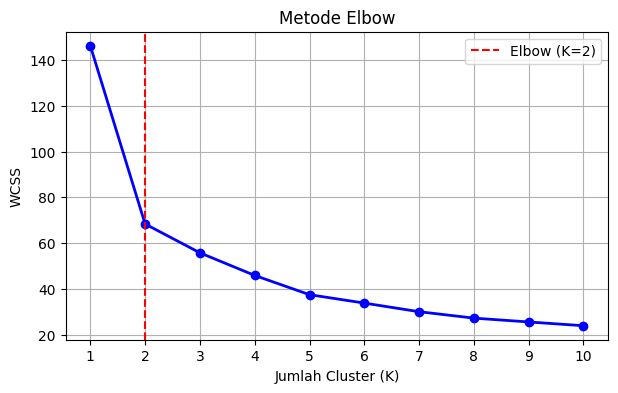

In [44]:
# Step 6: Plot Elbow Curve
plt.figure(figsize=(7, 4))
plt.plot(K_range, wcss, 'bo-', linewidth=2)
plt.axvline(x=elbow_k, color='r', linestyle='--', label=f'Elbow (K={elbow_k})')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.xticks(K_range)
plt.legend()
plt.show()


In [45]:

# Hitung centroid awal dengan metode k-means++
init_centroids, indices = kmeans_plusplus(data_values, n_clusters=elbow_k, random_state=42)

# Tampilkan centroid awal
print(f"\n📌 Centroid Awal (dari k-means++), untuk K={elbow_k}:")
for i, centroid in enumerate(init_centroids):
    print(f"Centroid {i}: {centroid}")



📌 Centroid Awal (dari k-means++), untuk K=2:
Centroid 0: [0.59411012 0.04113782 0.50397907 0.        ]
Centroid 1: [0.18693982 0.78810241 0.43529925 0.        ]


In [46]:
# Step 7: Cluster dengan K optimal
final_kmeans = KMeans(n_clusters=elbow_k, init='k-means++', random_state=42, n_init='auto')
cluster_labels = final_kmeans.fit_predict(data_values)


In [47]:
# Step 8: Tambahkan label cluster ke dataframe asli
df_filtered = df.loc[data.index].copy()
df_filtered['cluster'] = cluster_labels


In [48]:
# Tampilkan jumlah iterasi yang dilakukan
print(f"\n🔁 Jumlah iterasi K-Means hingga konvergen: {final_kmeans.n_iter_}")



🔁 Jumlah iterasi K-Means hingga konvergen: 4


In [49]:
# Step 9: Tampilkan jumlah data per cluster
print("\n📊 Jumlah data per cluster:")
print(df_filtered['cluster'].value_counts().sort_index())


📊 Jumlah data per cluster:
cluster
0    454
1    246
Name: count, dtype: int64


In [50]:
# Step 10: Simpan ke Excel
output_filename = 'clustered_output.xlsx'
df_filtered.to_excel(output_filename, index=False)
print(f"\n✅ Hasil disimpan ke file: {output_filename}")
#files.download(output_filename)



✅ Hasil disimpan ke file: clustered_output.xlsx


In [51]:
df_filtered

,name,artist,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,cluster
0,Klaxon,(G)I-DLE,0.890,0.130000,0.886,0.000000,0.3090,-3.408,0.1850,119.986,0.801,0
1,Arteri,.Feast,0.324,0.008420,0.928,0.000000,0.0709,-3.326,0.1050,182.095,0.255,0
2,Metakritik,.Feast,0.507,0.000269,0.920,0.001290,0.0855,-5.054,0.0454,143.010,0.633,0
3,Nina,.Feast,0.457,0.183000,0.630,0.438000,0.0879,-5.826,0.0268,90.009,0.332,0
4,"o,Tuan",.Feast,0.530,0.055300,0.628,0.122000,0.0737,-7.608,0.0287,131.037,0.224,0
...,...,...,...,...,...,...,...,...,...,...,...,...
695,Ajaib,Gempi,0.747,0.644000,0.627,0.018800,0.4710,-6.618,0.0323,96.980,0.398,1
696,Careless Whisper - Remastered,George Michael,0.581,0.283000,0.643,0.000002,0.0923,-8.525,0.0334,153.049,0.787,0
697,Gata Only,FloyyMenor,0.791,0.446000,0.499,0.000024,0.0899,-8.472,0.0509,99.986,0.669,0
698,PELIGROSA,FloyyMenor,0.776,0.319000,0.442,0.000013,0.0723,-8.990,0.0575,100.021,0.838,0


In [52]:
from sklearn.metrics import davies_bouldin_score

score = davies_bouldin_score(data_values, final_kmeans.labels_)
print(f"DBI score: {score:.4f}")


DBI score: 0.8040


In [53]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(data_values, cluster_labels)

print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.4765


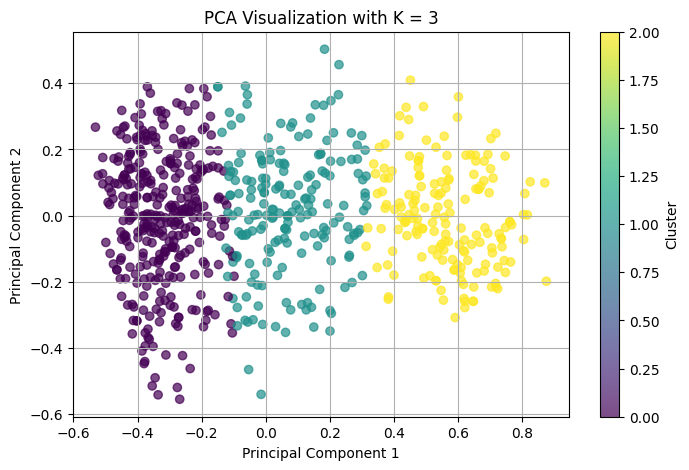

In [54]:
# --- IMPORT ---
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# --- STANDARISASI FITUR (penting buat PCA) ---
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = df_audio_scaled

# --- PCA (2 dimensi) ---
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# --- CLUSTERING ULANG UNTUK VISUALISASI ---
# Gunakan K yang sudah dipilih sebelumnya
k = 3  # atau sesuaikan
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto')
kmeans.fit(data_scaled)
labels = kmeans.labels_

# --- PLOT PCA 2D ---
plt.figure(figsize=(8, 5))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title(f'PCA Visualization with K = {k}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()
